In [357]:
#requires libgl1 so: sudo apt-get install libgl1  
import cv2 as cv
cv2 = cv 
from PIL import Image
from IPython.display import Image as dImage 
 

import plotly as ply
import plotly.io as pio 
import plotly.express as px, matplotlib.pyplot as plt, numpy as np 
print( cv.__version__)
from pathlib  import Path 
import os 

def ls( self, filter ='*',n: int = 10 ):
    return [ os.path.basename(x) for x in self.iterdir() ][0:n]

setattr( Path, 'ls', ls )

images_path = Path('/workspaces/MLLearningRepo/ComputerVision1/cells')
images = [ x for x in images_path.ls( ) if 'para' in x ]  

print(images)




4.10.0
['parasited3.png', 'parasited7.png', 'parasitted1.png', 'parasited4.png', 'parasited2.png', 'parasited6.png', 'parasited5.png']


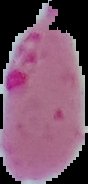

In [465]:

N = 6
IMG = images_path / images[N] 
image = cv.imread(IMG, cv.IMREAD_COLOR)
#matrix2 = np.ones(image.shape) * 1.35  
#print( matrix2.shape, image.shape )
#IMG = images_path / images[N] 
#image = cv.imread(IMG, cv.IMREAD_COLOR)
#image = np.uint8(cv.multiply(np.float64(image), matrix2))
Image.fromarray( image ).show( )

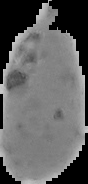

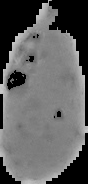

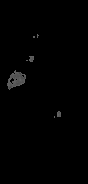

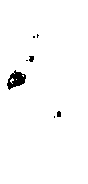

In [466]:
N = 6
IMG = images_path / images[N] 
image = cv.imread(IMG, cv.IMREAD_COLOR)

grey  = cv.cvtColor(image, 7 )
Image.fromarray( grey , 'L').show( )

xx = int(grey.mean()) #+5 
#threshMap = cv2.threshold(saliencyMap, 1, 255,cv.THRESH_BINARY) 
ret,thresh1 = cv.threshold(grey,xx,255,cv.THRESH_TOZERO)
# show the images
Image.fromarray( thresh1 , 'L').show( )

k = np.clip(cv.subtract(grey, thresh1),0,255)
Image.fromarray( k , 'L').show( )

xx = int(k.mean())#+8
ret,thresh1 = cv.threshold(k,xx,255,cv.THRESH_BINARY_INV)
Image.fromarray( thresh1 , 'L').show( )

0 199


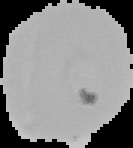

0.0 179.29939121277653
0 179


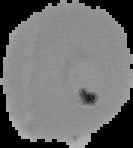

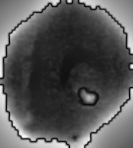

(148, 133)


In [529]:

N = 5
IMG = images_path / images[N] 
image = cv.imread(IMG, cv.IMREAD_COLOR)

grey  = cv.cvtColor(image, 7 )
print( grey.min(), grey.max())
Image.fromarray( grey , 'L').show( )
grey  = cv.cvtColor(image, 6 )
xx = grey[grey > 10] .mean()
grey = np.clip(grey.mean() + 1.4* ( grey - xx )+10, 0, 255 ) 
print( grey.min(), grey.max())
grey = np.uint8( grey ) 
print( grey.min(), grey.max())

Image.fromarray( grey , 'L').show( )

saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(grey)
saliencyMap = (saliencyMap * 255).astype("uint8")
Image.fromarray(  saliencyMap , 'L').show( )
print( grey.shape )

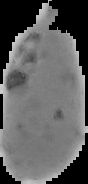

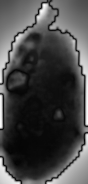

In [470]:


grey  = cv.cvtColor(image, 6 )
Image.fromarray( grey , 'L').show( )


saliency1 = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap1) = saliency1.computeSaliency(grey)
saliencyMap1= (saliencyMap1 * 255).astype("uint8")

saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(grey)
saliencyMap = (saliencyMap * 255).astype("uint8")
Image.fromarray(  saliencyMap , 'L').show( )


xx = int(saliencyMap.mean())#+15

#threshMap = cv2.threshold(saliencyMap, 1, 255,cv.THRESH_BINARY) 
ret,thresh1 = cv.threshold(grey,xx,255,cv.THRESH_TOZERO
                           )


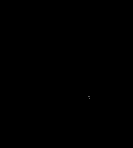

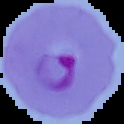

: 